# LSN exercise 2

## 2.1 Monte Carlo integration

The best values for the continuous normal pdf which best fit the datas are:
mean =  0.9997
stdev =  0.0152


An extimation for the intrinsic error in a MC calculation using uniform sampling is:
Integral error =  0.481


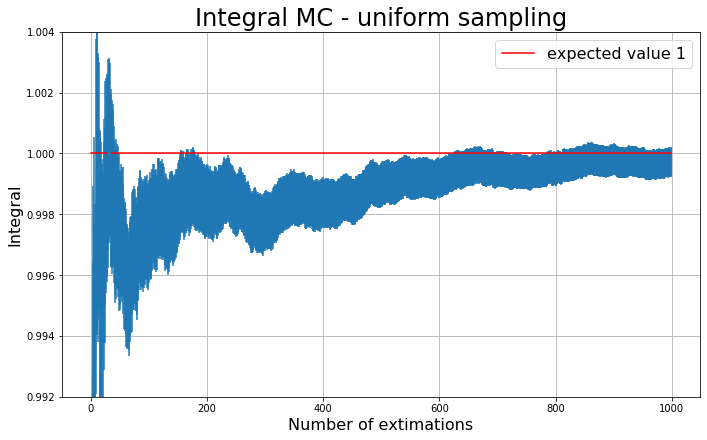

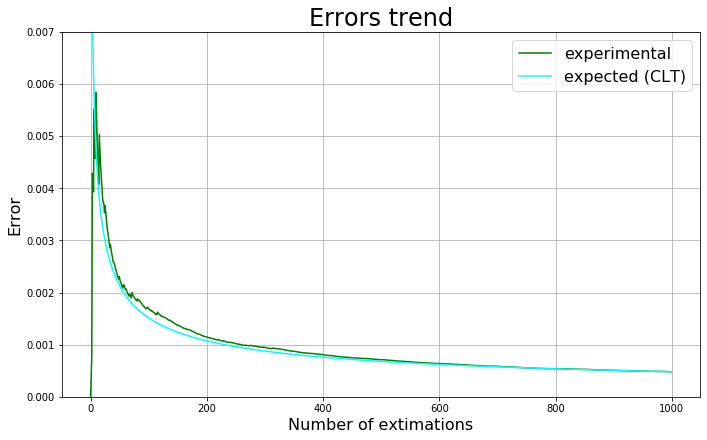

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

n_step = 1000     #numero di punti estratti per il calcolo di un singolo integrale
n_cell = 1000     #numero di blocchi

#sampling uniforme

file1 = open("I_unif.txt")
Means = [float(i) for i in file1.read().splitlines()]
file1.close()    
    
file2 = open("I_error_unif.txt")
Errors = [float(i) for i in file2.read().splitlines()]
file2.close()

TITLE_SIZE = 24
LABEL_SIZE = 16

t = np.arange(n_cell)

expected = [1 for i in t]

plt.figure(figsize=(6*0.5*(1+np.sqrt(5)),6), constrained_layout=True)
plt.errorbar(t, Means, yerr=Errors)
plt.title("Integral MC - uniform sampling", fontsize=TITLE_SIZE)
plt.xlabel("Number of extimations", fontsize=LABEL_SIZE)
plt.ylabel("Integral", fontsize=LABEL_SIZE)
plt.ylim(0.992,1.004)
plt.plot(t, expected, 'red', label="expected value 1")
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

#verifichiamo il CLT

import scipy.stats as stat

file3 = open("Integrali.txt")
integrali = [float(i) for i in file3.read().splitlines()]
file3.close()

(mu, sigma) = stat.norm.fit(integrali)       #parametri del fit gaussiano

print("The best values for the continuous normal pdf which best fit the datas are:")
print("mean = ", round(mu,4))
print("stdev = ", round(sigma,4))
print("\n")

theory = [sigma/np.sqrt(i+1) for i in t]     #andamento: sigma/sqrt(n_cell)

plt.figure(figsize=(6*0.5*(1+np.sqrt(5)),6), constrained_layout=True)
plt.plot(t, Errors, 'green', label="experimental")
plt.plot(t, theory, 'cyan', label="expected (CLT)")
plt.title("Errors trend", fontsize=TITLE_SIZE)
plt.xlabel("Number of extimations", fontsize=LABEL_SIZE)
plt.ylabel("Error", fontsize=LABEL_SIZE)
plt.ylim((0,0.007))
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

#estrapoliamo l'incertezza intrinseca sulla valutazione dell'integrale via, ancora una volta, il CLT

error = sigma*np.sqrt(n_step)     #per il CLT: sigma = error/sqrt(n_step)

print("An extimation for the intrinsic error in a MC calculation using uniform sampling is:")
print("Integral error = ", round(error,3))

The best values for the continuous normal pdf which best fit the datas are:
mean =  0.9999
stdev =  0.0067


An extimation for the intrinsic error in a MC calculation using exponential sampling is:
Integral error =  0.211


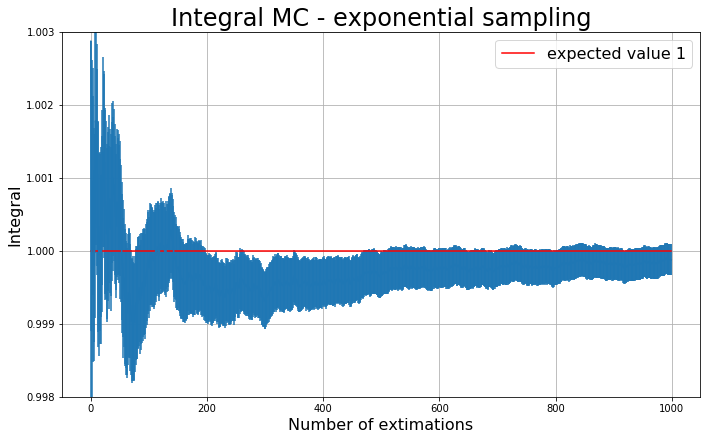

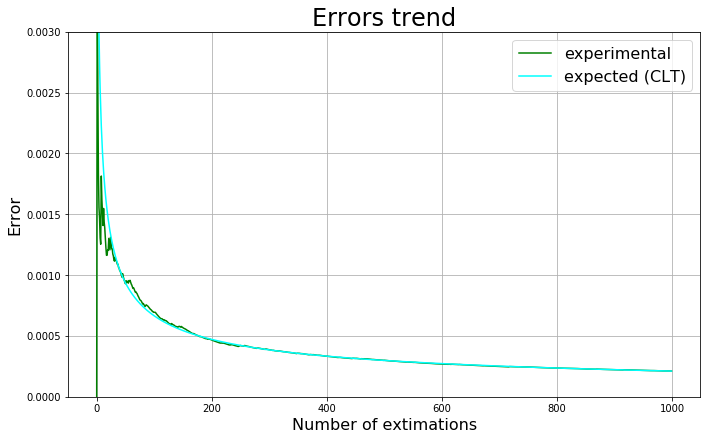

In [19]:
#sampling esponenziale

file1 = open("I_exp.txt")
Means = [float(i) for i in file1.read().splitlines()]
file1.close()    
    
file2 = open("I_error_exp.txt")
Errors = [float(i) for i in file2.read().splitlines()]
file2.close()

plt.figure(figsize=(6*0.5*(1+np.sqrt(5)),6), constrained_layout=True)
plt.errorbar(t, Means, yerr=Errors)
plt.title("Integral MC - exponential sampling", fontsize=TITLE_SIZE)
plt.xlabel("Number of extimations", fontsize=LABEL_SIZE)
plt.ylabel("Integral", fontsize=LABEL_SIZE)
plt.ylim(0.998,1.003)
plt.plot(t, expected, 'red', label="expected value 1")
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

#verifichiamo il CLT

file3 = open("Integrali_exp.txt")
integrali = [float(i) for i in file3.read().splitlines()]
file3.close()

(mu, sigma) = stat.norm.fit(integrali)       #parametri del fit gaussiano

print("The best values for the continuous normal pdf which best fit the datas are:")
print("mean = ", round(mu,4))
print("stdev = ", round(sigma,4))
print("\n")

theory = [sigma/np.sqrt(i+1) for i in t]     #andamento: sigma/sqrt(n_cell)

plt.figure(figsize=(6*0.5*(1+np.sqrt(5)),6), constrained_layout=True)
plt.plot(t, Errors, 'green', label="experimental")
plt.plot(t, theory, 'cyan', label="expected (CLT)")
plt.title("Errors trend", fontsize=TITLE_SIZE)
plt.xlabel("Number of extimations", fontsize=LABEL_SIZE)
plt.ylabel("Error", fontsize=LABEL_SIZE)
plt.ylim((0,0.003))
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

#estrapoliamo l'incertezza intrinseca sulla valutazione dell'integrale via, ancora una volta, il CLT

error = sigma*np.sqrt(n_step)     #per il CLT: sigma = error/sqrt(n_step)

print("An extimation for the intrinsic error in a MC calculation using exponential sampling is:")
print("Integral error = ", round(error,3))

## 2.2 Random walks